In [2]:
import scipy.io as sio #Load MATLAB file
import numpy as np
# download the training data form 

# the array dzip contain the numbers with length 1707
dzip = sio.loadmat('dzip.mat')['dzip'][0]
#the array azip contain the 1707 images for the numbers in dzip array
azip = sio.loadmat('azip.mat')['azip']

In [3]:
# in the function, we will count how many times the digit apper in dzip
def count_numbers_copies(dzip):
    # digits_copies_counter hold the number of copies
    digits_copies_counter =[]
    # hold the indexes of each digit in dzip
    indexes = []
    for digit in range (10):
        indexes.append ([])
        counter = 0
        for index, i in enumerate (dzip):
            if i == digit:
                counter +=1
                indexes[digit].append(index)
        digits_copies_counter.append(counter)
    return digits_copies_counter,indexes
digits_copies ,indexes =  count_numbers_copies(dzip)
for digit,copies in enumerate(digits_copies):
    print ("the count of copies of digit ",digit , " is ",copies ," copies ." )


the count of copies of digit  0  is  319  copies .
the count of copies of digit  1  is  252  copies .
the count of copies of digit  2  is  202  copies .
the count of copies of digit  3  is  131  copies .
the count of copies of digit  4  is  122  copies .
the count of copies of digit  5  is  88  copies .
the count of copies of digit  6  is  151  copies .
the count of copies of digit  7  is  166  copies .
the count of copies of digit  8  is  144  copies .
the count of copies of digit  9  is  132  copies .


In [4]:
# create numpy zreos matrices for each digit in array of size 10 
def numpy_zreos_matrices(digits_copies):
    array_of_matrices = []
    for copies in digits_copies:
        # create matrix for each digit depend on the number of copies and 256 which is 16 * 16 pixels
        M = np.zeros(shape=(256,copies))
        array_of_matrices.append(M)
    
    return array_of_matrices
digits_matrices = numpy_zreos_matrices(digits_copies)


In [5]:
# now we fill our digits_matrices with inforamtion imges from azip
def preparation_function(dzip,azip,digits_matrices):
    for i in range (10):
        counter =0
        for index , item  in enumerate(dzip):
            if item == i:
                digits_matrices[i][:,counter] = azip[:,index]
                counter += 1
    return digits_matrices
digits_matrices = preparation_function(dzip,azip,digits_matrices)

In [6]:
# find the distance between the image and the matrix of the digit
def find_the_distance(M,k,var,azip ):
    U0 , S ,VT = np.linalg.svd(M)
    smallU0 = U0[:,0:k]
    
    d =azip[:,var]
    I = np.eye(256)
    v =np.matmul ((I - np.matmul (smallU0 , smallU0.T)) , d)
    distance = np.linalg.norm(v)  
    return distance 

In [7]:
# here we import time for performance measurement
import time

# training the model and find best k
def find_All_k(digits_matrices,azip,var,Ks):
    distances=[]
    Periods = []
    Ks = Ks +1 # because we will have less Ks by one since we start k for loop by 1 
    for k in range (1,Ks):
        distances.append([])# this list for number form 0 to 9
        Periods.append([])
        for M in digits_matrices:
            start = time.time()
            distance  = find_the_distance(M,k,var,azip)
            end = time.time()
            period = end - start
            Periods[k-1].append(period)
            distances[k-1].append(distance)
    return distances,Periods

def prediction(distances):
    predict_List=[]
    for row in distances:
        x = min(v for v in row) # here we take the smallest distance 
        index = row.index(x)    # we will take the index of that smallest distance
                                # because it represents the digit
        predict_List.append(index)
        
    return predict_List         # the index of predict_List will represent the k value

Ks=20 # we will use 20 Ks
var = 345# which is index of digit 2  345
    
distances ,Periods= find_All_k(digits_matrices,azip,var,Ks)  
predict_List  = prediction(distances)
Periods_List  = []
# here sum all Periods for a k  
for i in Periods:
    Periods_List.append(sum(i))
    
for i in range (Ks):
    print ("k =",i+1,"  predict=",predict_List[i],"  ",
           predict_List[i] == dzip[var] ,"  Period =",Periods_List[i])
print ("the corect value is = ",dzip[var])



k = 1   predict= 0    False   Period = 0.1271824836730957
k = 2   predict= 0    False   Period = 0.08931517601013184
k = 3   predict= 0    False   Period = 0.08817315101623535
k = 4   predict= 0    False   Period = 0.08766674995422363
k = 5   predict= 0    False   Period = 0.0878744125366211
k = 6   predict= 2    True   Period = 0.08762431144714355
k = 7   predict= 2    True   Period = 0.08747434616088867
k = 8   predict= 2    True   Period = 0.08789634704589844
k = 9   predict= 2    True   Period = 0.08763265609741211
k = 10   predict= 2    True   Period = 0.08756375312805176
k = 11   predict= 2    True   Period = 0.08813643455505371
k = 12   predict= 2    True   Period = 0.09411501884460449
k = 13   predict= 2    True   Period = 0.08840346336364746
k = 14   predict= 2    True   Period = 0.0970914363861084
k = 15   predict= 2    True   Period = 0.08852624893188477
k = 16   predict= 2    True   Period = 0.10547947883605957
k = 17   predict= 2    True   Period = 0.14229893684387207
k = 

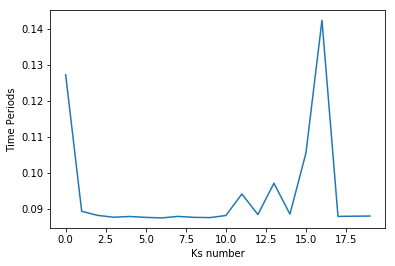

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Periods_List)
plt.ylabel('Time Periods')
plt.xlabel('Ks number')
plt.show()

In [9]:
Ks=20 # we will use 20 Ks
# take 1:30 hour 
Best_k_list=[0]* Ks # List of zeros to find the best k
for var in range(len (dzip)):# which is 1707 all the data set samples
    print (var)
    distances ,Periods= find_All_k(digits_matrices,azip,var,Ks)
    # I need to add all Periods togther in the same k to give some maening  
    predict_List  = prediction(distances)
    Periods_List  = []
    for i in Periods:
        Periods_List.append(sum(i))
    for i in range (Ks):
        if predict_List[i] == dzip[var]:
            # if true increase the best k for these loop by one
            Best_k_list[i] +=1
            # here in this loop try to find smallest correct k then break
            break
    if var == 10 :
        break
print (Best_k_list)

0
1
2
3
4
5
6
7
8
9
10
[11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [102]:

f = open ("Best_k_list.txt","w+")
f.write(str(Best_k_list))
f.close()

In [103]:
f = open ("Best_k_list.txt","r")
Best_k_listr = f.read()
print (Best_k_listr)
f.close()

[1464, 131, 45, 23, 9, 10, 7, 2, 1, 2, 1, 3, 1, 1, 0, 2, 2, 0, 1, 0]


In [104]:
print ("so the best k for this data set is 6 ")

so the best k for this data set is 6 
